In [70]:
### BEGIN "Data Collection/Cleaning" NOTEBOOK'S WORK
import pandas as pd
import requests
cleaned = []
for county_code in ["081", "037", "079"]:
  df_all = []
  for i in range(1998, 2019):
    if i in range(1998, 2003):
      response = requests.get("https://api.census.gov/data/" + str(i) + "/cbp?get=NAICS1997,NAICS1997_TTL,EMP,PAYANN,ESTAB&for=county:" + county_code + "&in=state:06&key=451427d6735c3eabbe226567a036b078171fd967")
    elif i in range(2003, 2008):
      response = requests.get("https://api.census.gov/data/" + str(i) + "/cbp?get=NAICS2002,NAICS2002_TTL,EMP,PAYANN,ESTAB&for=county:" + county_code + "&in=state:06&key=451427d6735c3eabbe226567a036b078171fd967")
    elif i in range(2008, 2012):
      response = requests.get("https://api.census.gov/data/" + str(i) + "/cbp?get=NAICS2007,NAICS2007_TTL,EMP,PAYANN,ESTAB&for=county:" + county_code + "&in=state:06&key=451427d6735c3eabbe226567a036b078171fd967")
    elif i in range(2012, 2017):
      response = requests.get("https://api.census.gov/data/" + str(i) + "/cbp?get=NAICS2012,NAICS2012_TTL,EMP,PAYANN,ESTAB&for=county:" + county_code + "&in=state:06&key=451427d6735c3eabbe226567a036b078171fd967")
    elif i in range(2017, 2019):
      response = requests.get("https://api.census.gov/data/" + str(i) + "/cbp?get=NAICS2017,NAICS2017_LABEL,EMP,PAYANN,ESTAB&for=county:" + county_code + "&in=state:06&key=451427d6735c3eabbe226567a036b078171fd967")
    df = pd.DataFrame(response.json()[1:], columns=["Code", "Title", "EMP", "PAYANN", "ESTAB", "state", "county"])
    df["Year"] = i
    df["state"] = df["state"].astype(int)
    df_all.append(df)
  concatted_counties = pd.concat(df_all, ignore_index=True)
  concatted_counties["Code"] = concatted_counties["Code"].map(lambda x : x.strip())
  cleaned.append(concatted_counties)
  ### END "Data Collection/Cleaning" NOTEBOOK'S WORK

Our research question that we set out to answer was: ?

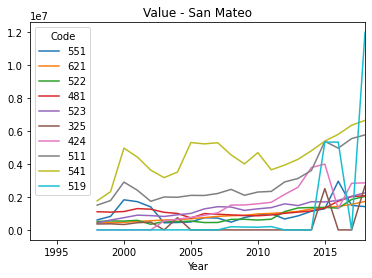

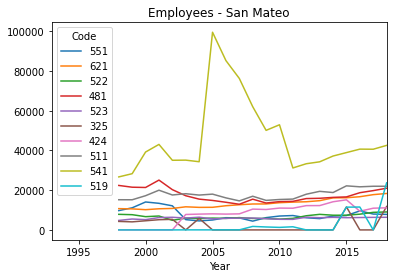

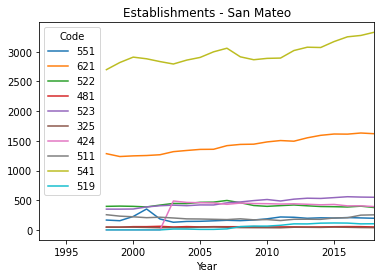

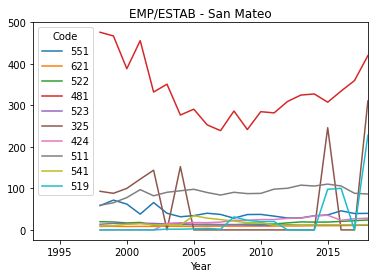

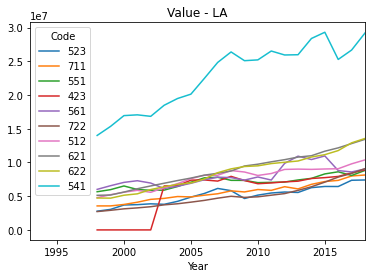

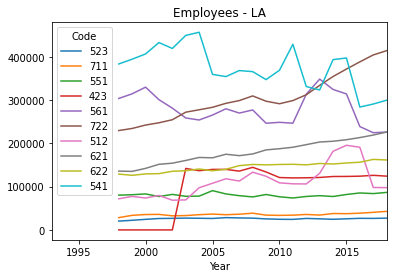

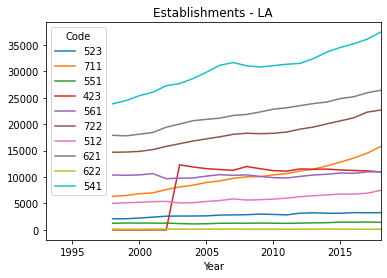

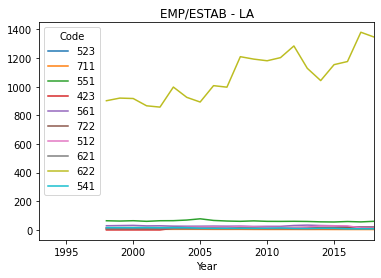

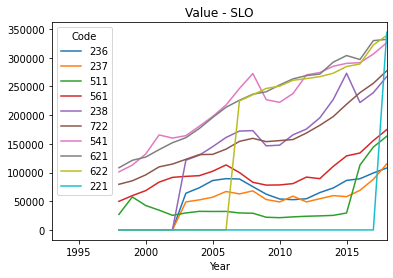

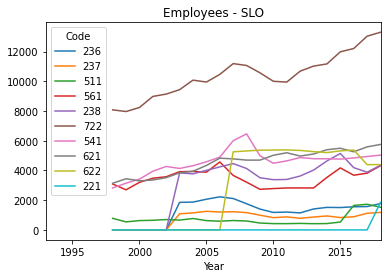

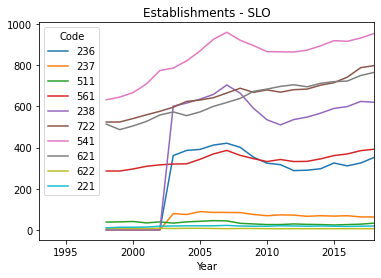

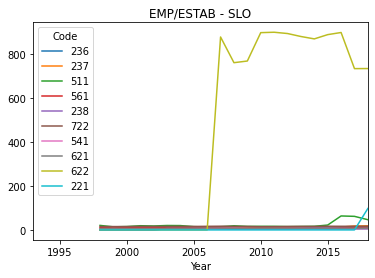

In [83]:
for df, name in zip(cleaned, ["San Mateo", "LA", "SLO"]):
  current = df[df["Code"].map(lambda x : len(x.strip())) == 3].set_index(["Code", "Year"])
  indexes = current.unstack("Year")["PAYANN"].fillna(0).astype(int).sort_values(2018)[-10:].index
  current.unstack("Year")["PAYANN"].fillna(0).astype(int).loc[indexes].T.plot(xlim=[1993,2018],title="Value - " + name) # Shows industries' worth

  current.unstack("Year")["EMP"].fillna(0).astype(int).loc[indexes].T.plot(xlim=[1993,2018],title="Employees - " + name) # Shows how many employees work in the most valuable industries

  current.unstack("Year")["ESTAB"].fillna(0).astype(int).loc[indexes].T.plot(xlim=[1993,2018],title="Establishments - " + name) # Shows how many establishments there are in an industry

  current["EMP/ESTAB"] = current["EMP"].astype(int) / current["ESTAB"].astype(int)
  current.unstack("Year")["EMP/ESTAB"].fillna(0).astype(float).loc[indexes].T.plot(xlim=[1993,2018],title="EMP/ESTAB - " + name) # Shows how many employees there are compared to how many companies
  

Top 10 industries in SLO County are Construction, Heavy and Civil Engineering Construction, Publishing Industries (Besides internet), Administrative and Support Services, Specialty Trade Contractors, Food Services and Drinking Places, Professional, Scientific, and Technical Services, Ambulatory Health Care Services, Hospitals, and Utilities.

Top 10 industries in LA are Securities, Commodity Contracts, and Other Financial Investments and Related Activities, Performing Arts, Spectator Sports, and Related Industries,	Management of Companies and Enterprises, Merchant Wholesalers, Durable Goods, Administrative and Support Services, Food Services and Drinking Places, Motion Picture and Sound Recording Industries, Ambulatory Health Care Services, Hospital, Professional, Scientific, and Technical Services

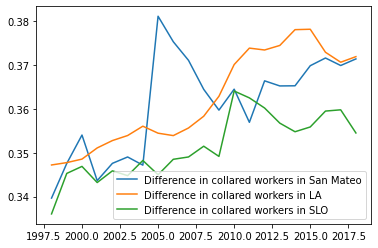

In [143]:
diff = pd.Series(dtype="float64", index=range(1998, 2019))
for df, name in zip(cleaned, ["San Mateo", "LA", "SLO"]):
  current = df[df["Code"].map(lambda x : len(x.strip())) == 2].set_index(["Year"])
  current["Blue Collar"] = current["Code"].astype(int) < 50
  blue_collar = current[current["Blue Collar"]]
  white_collar = current[~current["Blue Collar"]]
  for i in range(1998, 2019):
    diff[i] = white_collar.loc[i]["EMP"].astype(int).sum() / (blue_collar.loc[i]["EMP"].astype(int).sum() + white_collar.loc[i]["EMP"].astype(int).sum())
  diff.plot(legend=True, label="Difference in collared workers in " + name) # What % share do White collared workers make up?